In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("/content/Walmart_Sales.csv")
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Check missing values
df.isnull().sum()

# Drop missing values
df.dropna(inplace=True)

# Convert Date to datetime with specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check duplicates
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
total_sales = df['Weekly_Sales'].sum()

print("Total Sales:", total_sales)

Total Sales: 6737218987.11


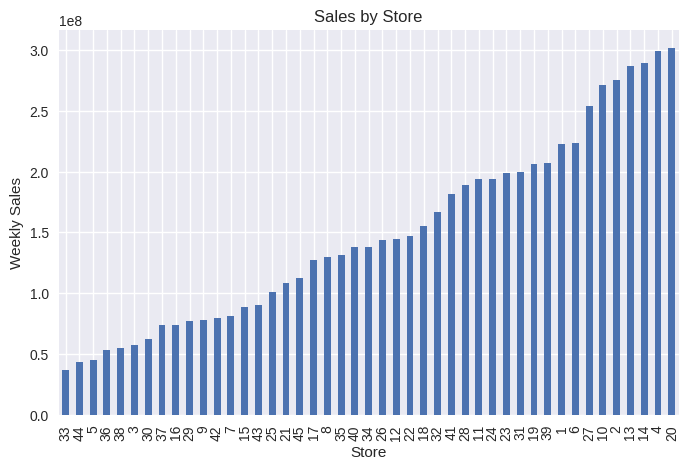

In [9]:
region_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

region_sales.plot(kind='bar', figsize=(8,5), title="Sales by Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

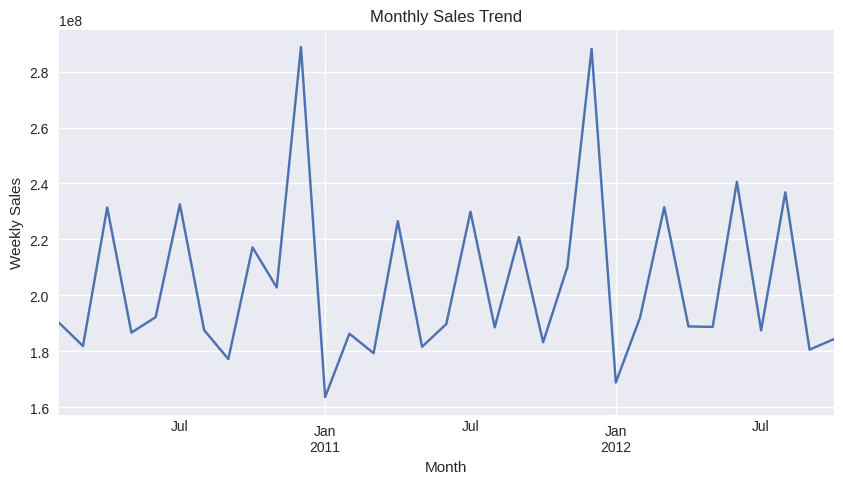

In [11]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

monthly_sales.plot(figsize=(10,5), title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.show()

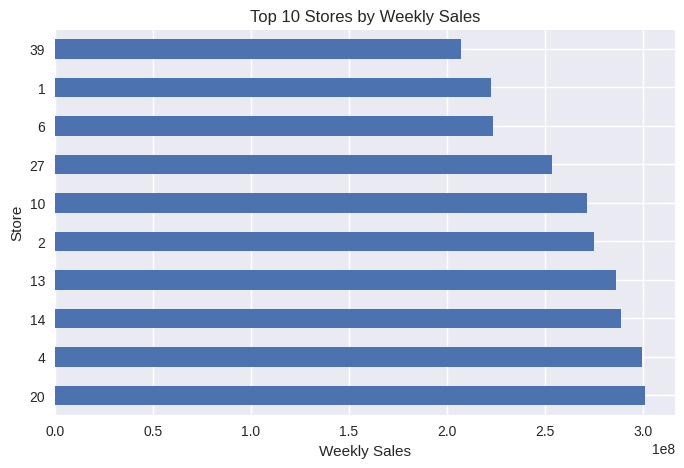

In [13]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

top_stores.plot(kind='barh', figsize=(8,5), title="Top 10 Stores by Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Store")
plt.show()

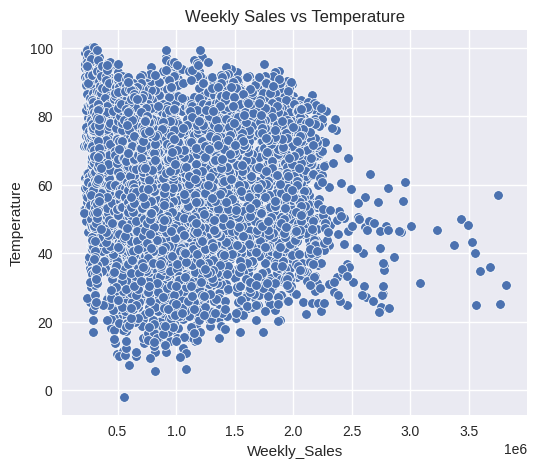

In [15]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Weekly_Sales', y='Temperature', data=df)
plt.title("Weekly Sales vs Temperature")
plt.show()

In [17]:
print("Best Performing Region:", region_sales.idxmax())
print("Worst Performing Region:", region_sales.idxmin())

Best Performing Region: 20
Worst Performing Region: 33


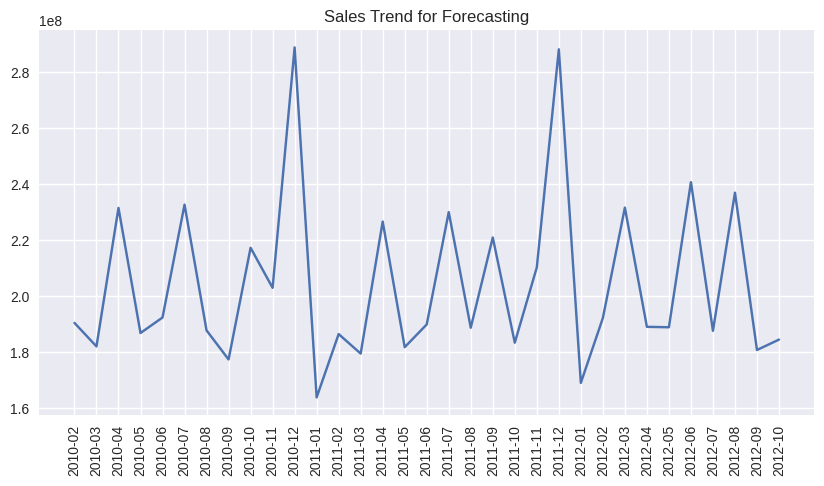

In [19]:
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month'] = monthly_sales_df['Month'].astype(str)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales_df['Month'], monthly_sales_df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.title("Sales Trend for Forecasting")
plt.show()